<a href="https://colab.research.google.com/github/LaisST/FIAP_202501_HandsOn_data_analytics/blob/main/Fase2_Aula05_Modelo_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 05 - Modelo Regressão

In [1]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Importar a base de dados
imoveis = pd.read_csv('/content/Valorizacao_Ambiental.csv', sep=';')
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [3]:
# Consultar os tipos de dados e informações sobre a base
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Ordem     172 non-null    int64
 1   Valor     172 non-null    int64
 2   Area      172 non-null    int64
 3   IA        172 non-null    int64
 4   Andar     172 non-null    int64
 5   Suites    172 non-null    int64
 6   Vista     172 non-null    int64
 7   DistBM    172 non-null    int64
 8   Semruido  172 non-null    int64
 9   AV100m    172 non-null    int64
dtypes: int64(10)
memory usage: 13.6 KB


A base contém com 10 colunas e 172 linhas.
Não contém valores nulos e todas as colunas são do tipo inteiro.

In [4]:
# Outra forma de consultar valores nulos
imoveis.isnull().sum()

,0
Ordem,0
Valor,0
Area,0
IA,0
Andar,0
Suites,0
Vista,0
DistBM,0
Semruido,0
AV100m,0


In [5]:
# Estatítica descritiva
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


### Identificando a variável Target

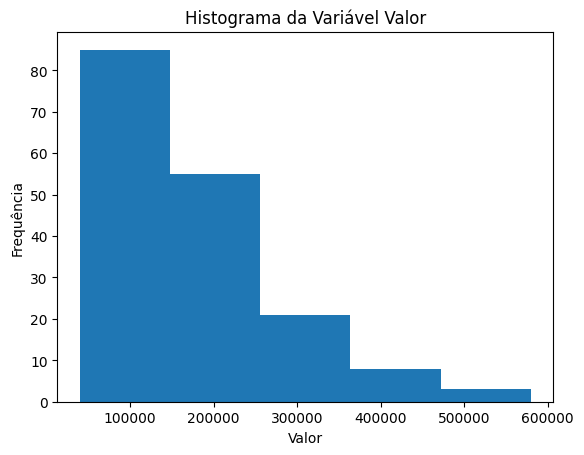

In [6]:
plt.hist(imoveis['Valor'], bins=5)

plt.ylabel('Frequência')
plt.xlabel('Valor')

plt.title('Histograma da Variável Valor')

plt.show()

Ampliar a distribuição dos valores para entender melhor onde estão os dados usando a Raiz Quadrada do valor.

Aplicar a raiz quadrada no valor dos imóveis é uma forma de “equilibrar” a distribuição, diminuindo o peso dos imóveis muito caros e espalhando melhor os imóveis mais baratos. Isso torna a análise estatística mais confiável e os gráficos mais informativos.

Reduzir a assimetria – os valores muito altos “puxam” a média para cima. A raiz quadrada comprime mais os valores grandes do que os pequenos, aproximando a distribuição de uma forma mais “normal” (simétrica).

Exemplo:

Sem transformação: valores → [100.000, 400.000] → diferença = 300.000

Com √: valores → [316, 632] → diferença ≈ 316
→ Os valores grandes foram encurtados proporcionalmente.

In [7]:
# Criar uma coluna com a raíz quadrada
imoveis['raiz_valor'] = np.sqrt(imoveis['Valor'])
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


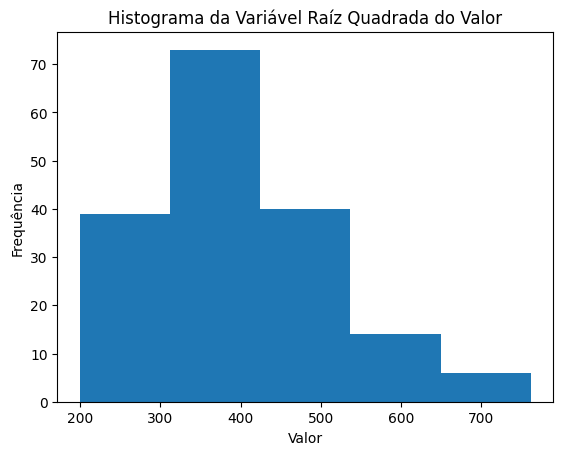

In [8]:
# Histograma da Raiz Quadrada
plt.hist(imoveis['raiz_valor'], bins=5)

plt.ylabel('Frequência')
plt.xlabel('Valor')

plt.title('Histograma da Variável Raíz Quadrada do Valor')

plt.show()

### Decidir quais variáveis serão usadas no modelo de regressão

#### Variáveis Quantitativas

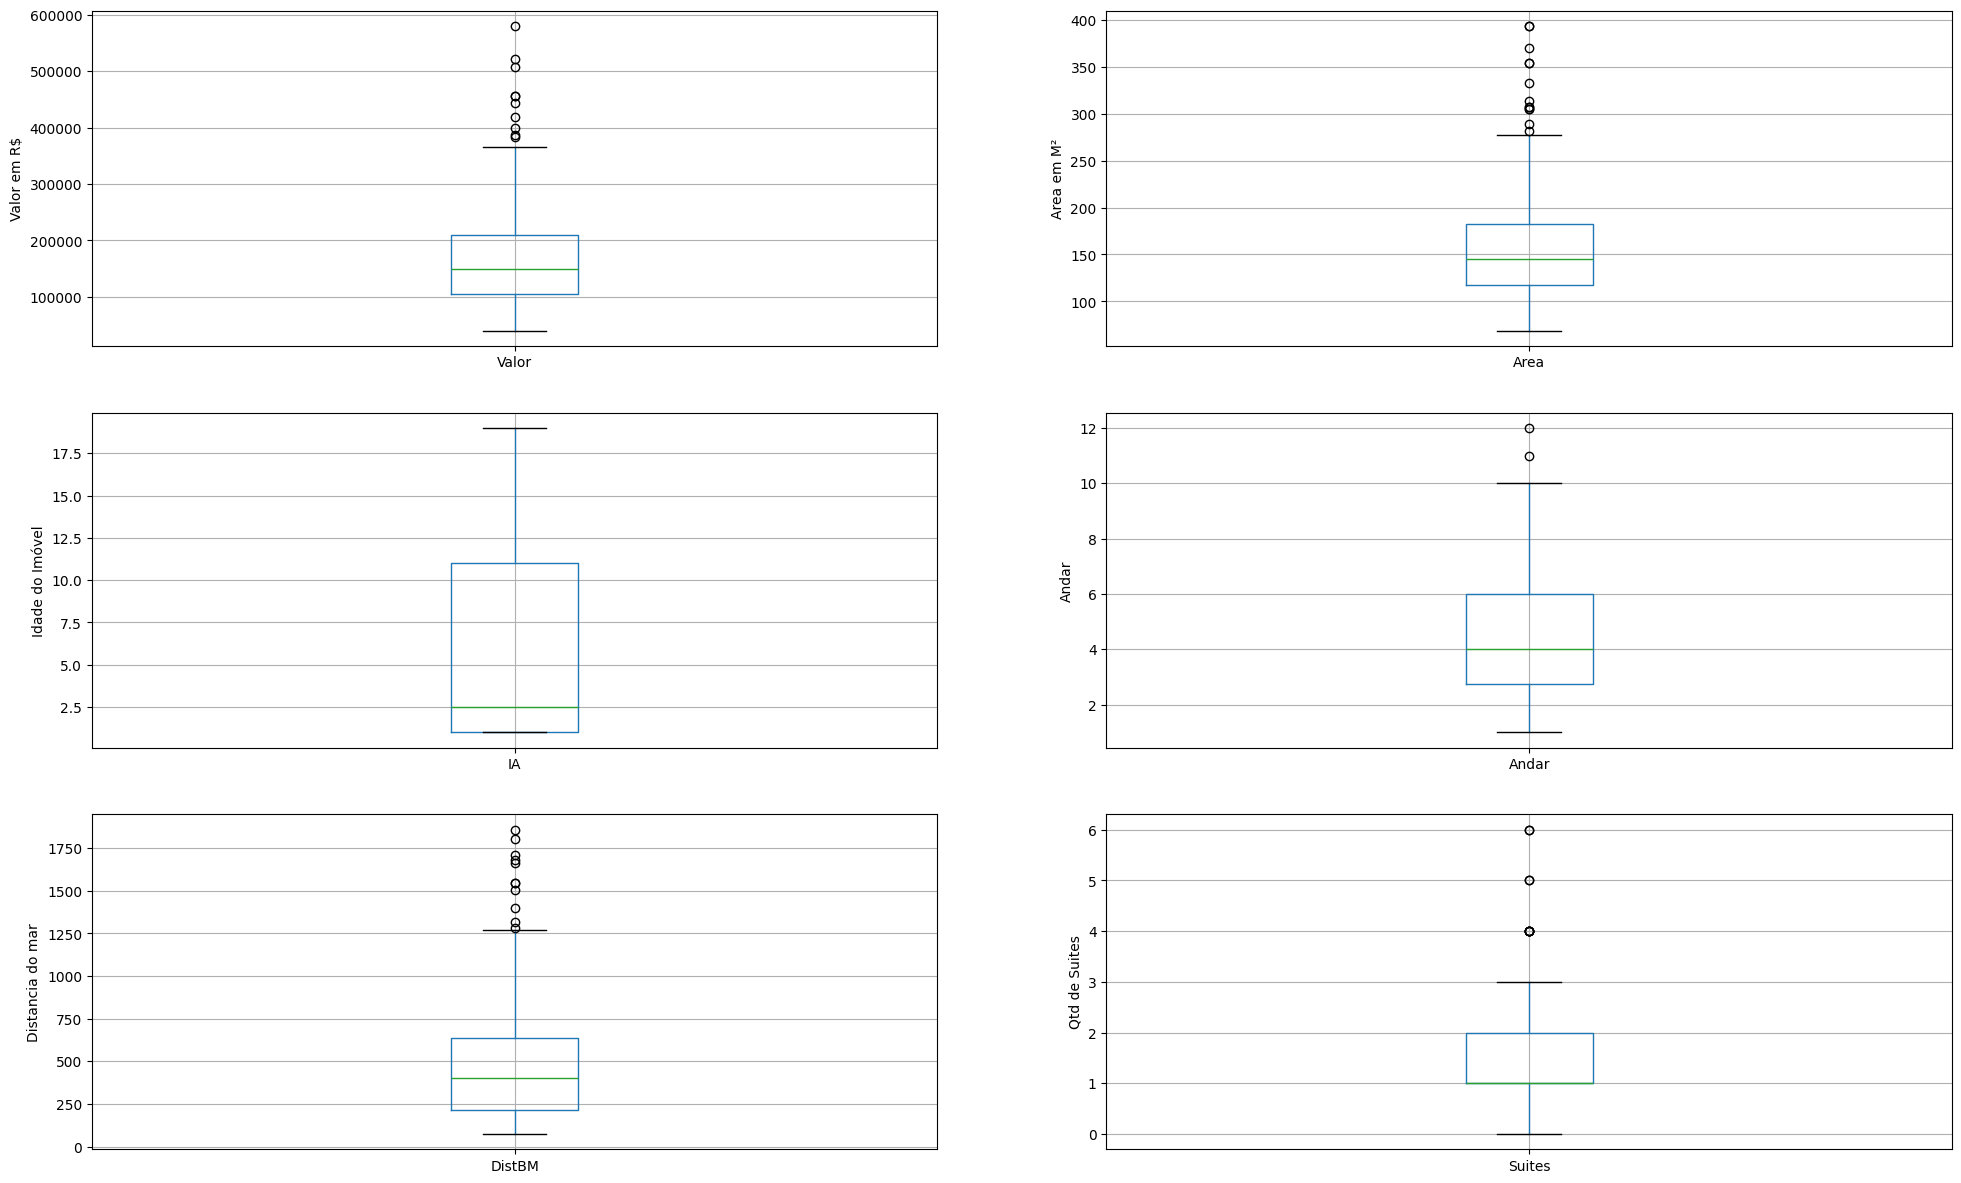

In [9]:
# Verificar se tem outliers
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = imoveis.boxplot(column='Valor')
fig.set_title('')
fig.set_ylabel('Valor em R$')

plt.subplot(4,2,2)
fig = imoveis.boxplot(column='Area')
fig.set_title('')
fig.set_ylabel('Area em M²')

plt.subplot(4,2,3)
fig = imoveis.boxplot(column='IA')
fig.set_title('')
fig.set_ylabel('Idade do Imóvel')

plt.subplot(4,2,4)
fig = imoveis.boxplot(column='Andar')
fig.set_title('')
fig.set_ylabel('Andar')

plt.subplot(4,2,5)
fig = imoveis.boxplot(column='DistBM')
fig.set_title('')
fig.set_ylabel('Distancia do mar')

plt.subplot(4,2,6)
fig = imoveis.boxplot(column='Suites')
fig.set_title('')
fig.set_ylabel('Qtd de Suites')

plt.show()

<Axes: >

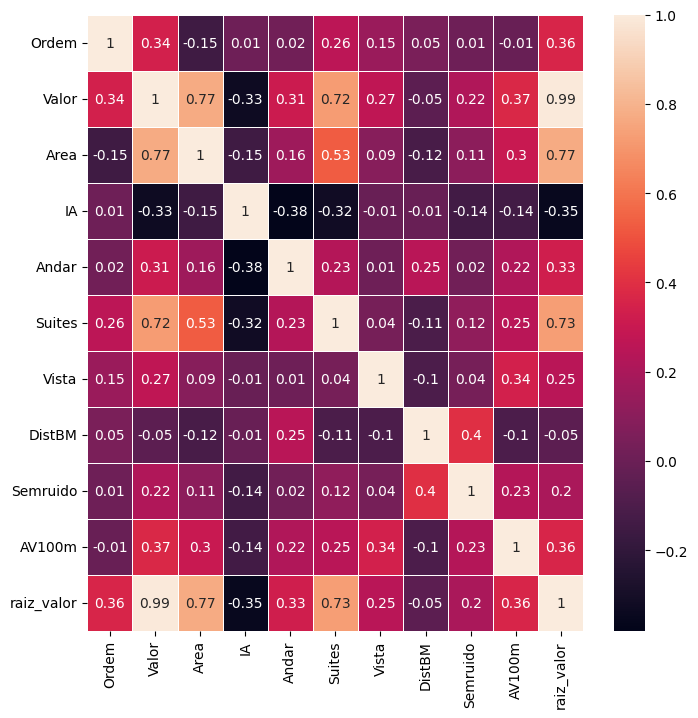

In [10]:
# Correlação
correlation_matrix = imoveis.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax = ax)


Podemos observar as variaveis com a maior correlação com a variavel target (Valor)

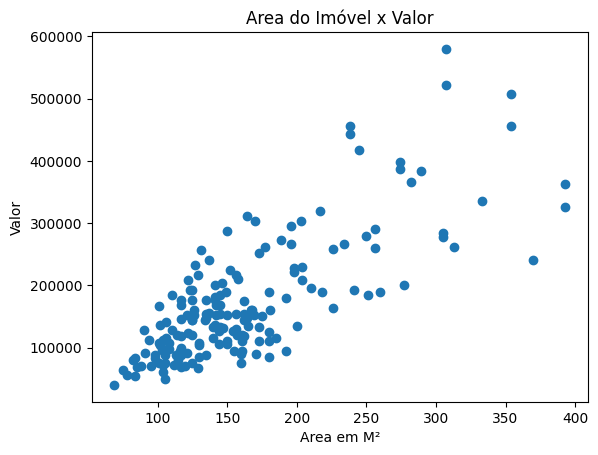

In [11]:
plt.scatter('Area', 'Valor', data=imoveis)

plt.xlabel('Area em M²')
plt.ylabel('Valor')
plt.title('Area do Imóvel x Valor')

plt.show()

Podemos observar que a área do imóvel tem uma correspondencia melhor com relação ao Valor

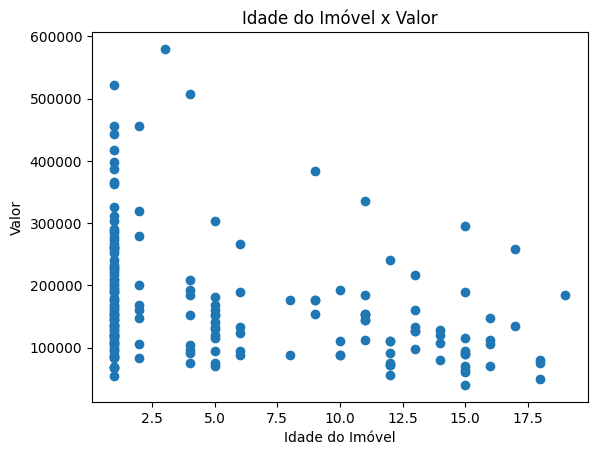

In [12]:
plt.scatter('IA', 'Valor', data=imoveis)

plt.xlabel('Idade do Imóvel')
plt.ylabel('Valor')
plt.title('Idade do Imóvel x Valor')

plt.show()

Já a Idade do imível não correlaciona com o valor

/tmp/ipython-input-1169908524.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Vista', y='Valor', data=imoveis, palette='hls')


<Axes: xlabel='Vista', ylabel='Valor'>

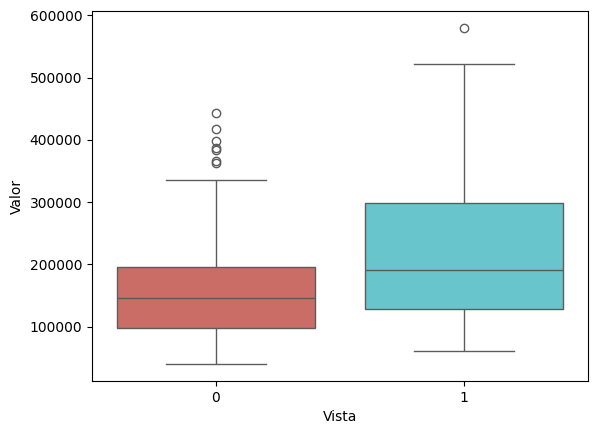

In [13]:
sb.boxplot(x='Vista', y='Valor', data=imoveis, palette='hls')

/tmp/ipython-input-4213590339.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Semruido', y='Valor', data=imoveis, palette='hls')


<Axes: xlabel='Semruido', ylabel='Valor'>

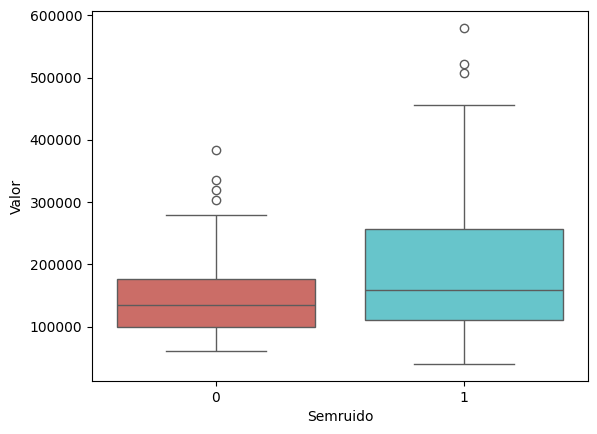

In [14]:
sb.boxplot(x='Semruido', y='Valor', data=imoveis, palette='hls')

### Criar o modelo de regressão

In [15]:
#Regressão Linear múltipla
from sklearn.linear_model import LinearRegression

#Criar um objeto de Regressão Linear
lr = LinearRegression()

In [16]:
# x contém as variáveis pretidoras ou independentes
x = imoveis[['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m', 'DistBM']]

# y contém a target ou dependente
y = imoveis[['Valor']]

In [17]:
from sklearn.model_selection import train_test_split

#Separar os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 101)

In [18]:
#Treinar o modelo
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
#Calcular o valor predito da variavel resposta na amostra teste
y_pred = lr.predict(x_test)

Primeiro vamos olhar o INtercepto e os coeficientes da Regressão.
Representa o valor esperado da variável dependente quando todas as variáveis independentes são iguais
Em termos gráficos, o intercepto é o ponto onde a linha de regressão cruza o eixo vertical (eixo y)

In [20]:
print(f'Intercepto: {lr.intercept_}')

Intercepto: [-40165.8752773]


In [23]:
# Os coeficientes da Regressão linear representam as inclinações da linha de regressão para cada variável
coeficientes = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coeficientes

,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


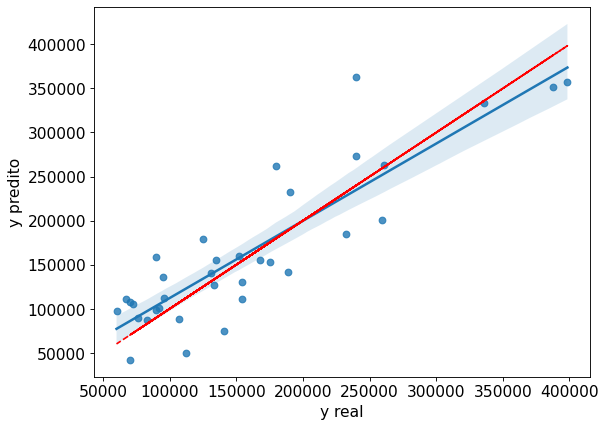

In [27]:
#Gráfico
fig = plt.figure(figsize=(8,6), dpi=80)
plt.rcParams.update({'font.size': 14})
ax = sb.regplot(x = y_test, y = y_pred)
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')

plt.show()

### Avaliar o modelo

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {MAE}') # Média do valor absoluto dos erros
print(f'MSE: {MSE}') # Média dos erros quadráticos
print(f'r²: {r2}') # (R-quadrado)

MAE: 34422.98857094584
MSE: 1844288772.1790097
r²: 0.7584591969125003


### Treinando em outros modelos

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
# Criar o modelo
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [32]:
y_pred_model_dtr = model_dtr.predict(x_test)

In [33]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)
print(f'MAE: {MAE}') # Média do valor absoluto dos erros
print(f'MSE: {MSE}') # Média dos erros quadráticos
print(f'r²: {r2}') # (R-quadrado)

MAE: 44913.75102040816
MSE: 3223969337.3848395
r²: 0.577766695417574


### Testando outro modelo

In [34]:
from sklearn.svm import SVR

In [35]:
#Criar o modelo SVR
svr = SVR(kernel='linear')

In [36]:
svr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [37]:
y_pred_svr = svr.predict(x_test)

In [38]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
print(f'MAE: {MAE}') # Média do valor absoluto dos erros
print(f'MSE: {MSE}') # Média dos erros quadráticos
print(f'r²: {r2}') # (R-quadrado)

MAE: 43153.53918496288
MSE: 3123421996.7782364
r²: 0.5909350700044546
